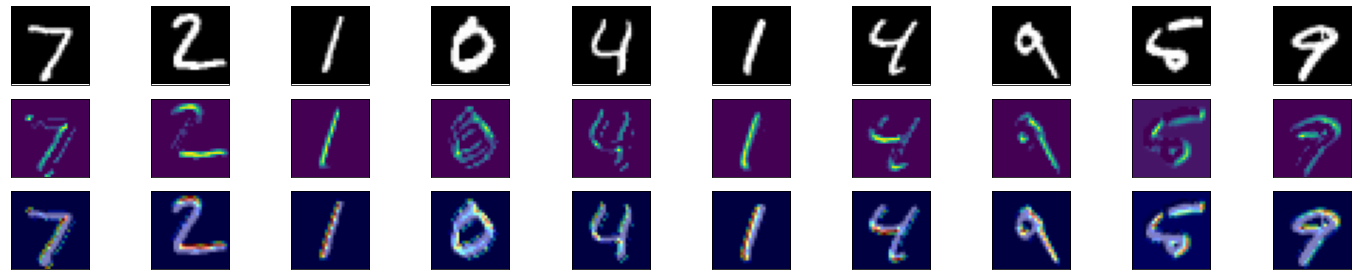

In [24]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
import numpy as np
import cv2
from PIL import Image

import os
os.chdir('/home/eis/disk5/Kichang/EXPFL')
import sys
sys.path.insert(0, '/home/eis/disk5/Kichang/EXPFL')
import DataManager.datamanager as dm
from models.CNN import CNN
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
import matplotlib.pyplot as plt

_, testset = dm.MNIST()
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False, drop_last=False)
for idx, (data, target) in enumerate(testloader):
    if idx == 0:
        input_tensor = data
        break
model = CNN(n_class=10)
model.load_state_dict(torch.load('./checkpoints/EXPFL/Naive_test.pt'))

cam = GradCAM(model=model, target_layers=[model.conv1])
grayscale_cams = cam(input_tensor=input_tensor)

fig, axes = plt.subplots(3,10, figsize=(20,4))
for i in range(10):
    grayscale_cam = grayscale_cams[i, :]
    rgb_img = np.array(data[i].permute(1,2,0))
    # Plot figures
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
    axes[0,i].imshow(rgb_img, cmap='gray')
    axes[0,i].set_xticks([])
    axes[0,i].set_yticks([])
    axes[1,i].imshow(grayscale_cam)
    axes[1,i].set_xticks([])
    axes[1,i].set_yticks([])
    axes[2,i].imshow(visualization)
    axes[2,i].set_xticks([])
    axes[2,i].set_yticks([])
plt.tight_layout()
plt.show()